# LDDS

## Tutorial 6: Lagrangian descriptors for a user-defined 2 DoF Hamiltonian

The goal of this notebook in to illustrate how to compute Lagrangian descriptors on different phase space slices for a 2 DoF Hamiltonian system defined by the user.

We begin by importing the LDDS module, and from it, all the functions necessary to calculate and plot LDs.

In [39]:
import os, sys
sys.path.insert(1, os.pardir)
import ldds
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### The Double Well Hamiltonian System with 2 DoF

The Hamiltonian function that defines a double well system with two degrees of freedom is:

\begin{equation*}
H(x, y, p_x, p_y) = T(p_x,p_y) + V(x,y) = \frac{1}{2} (p_x^2 + p_y^2) + \dfrac{\omega}{2}y^2 - \dfrac{\alpha}{2}x^2 + \dfrac{\beta}{4} x^4
\end{equation*}

where $\alpha,\, \beta,\, \omega > 0$ are the model parameters. Hamilton's equations describing the dynamical system are:

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} =  p_x \\[.2cm]
 \dot{y} &= \frac{\partial H}{\partial p_y} = p_y \\[.2cm]
 \dot{p}_x &= -\frac{\partial H}{\partial x} = \alpha \, x - \beta \, x^3 \\[.2cm]
 \dot{p}_y &= -\frac{\partial H}{\partial y} =  -\omega \, y \\[.2cm]
\end{align*}

Define the `DoubleWell2D` function containing the four-dimensional dynamical system

In [40]:
def DoubleWell2D(t, u, PARAMETERS = [1, 1, 1]):
    """
    Returns 2-DoF vector field (Double Well system), for an array of points in phase space.
    Number of model parameters:  1 . PARAMETERS = [alpha, beta, omega]
    Functional form: v = (p_x, p_y, alpha*x - beta*x**3, -omega*y), with u = (x, y, p_x, p_y)
    
    Parameters
    ----------  
    t : float
        fixed time-point of vector field, for all points in phase space.
        
    u : array_like, shape(n,)
        Points in phase space.
        
    PARAMETERS : list of floats
        Vector field parameters.
    
    Returns
    -------
    v : array_like, shape(n,)
        Vector field corresponding to points u, in phase space at time t.
    """
    N_dims = u.shape[-1]
    points_positions = u.T[:int(N_dims/2)]
    points_momenta = u.T[int(N_dims/2):]
    x, y = points_positions
    p_x, p_y = points_momenta 
    
    # Hamiltonian Model Parameters
    alpha, beta, omega = PARAMETERS
    
    # Vector field defintion
    v_x   =  p_x
    v_y   =  p_y
    v_p_x =  alpha * x - beta * x**3
    v_p_y = - omega * y
    v = np.column_stack([v_x, v_y, v_p_x, v_p_y])
    return v

Define the potential energy surface for the double well:

\begin{equation*}
V(x,y) = \dfrac{\omega}{2}y^2 - \dfrac{\alpha}{2}x^2 + \dfrac{\beta}{4} x^4
\end{equation*}

In [41]:
def DoubleWell_PES(positions, PARAMETERS = [1, 1, 1]):
    x, y = positions.T
    # Function parameters
    alpha, beta, omega = PARAMETERS
    # Potential energy function
    V = (beta/4) * x**4 - (alpha/2) * x**2 + (omega/2) * y**2
    return V

### Setup the vector field and potential energy surface

In [42]:
# Double well parameters
alpha, beta, omega = [1, 2, 1]

# Define Hamiltonian vector field
vector_field = lambda t,u: DoubleWell2D(t, u, PARAMETERS = [alpha, beta, omega])

# Define the potential energy surface
potential_energy = lambda u: DoubleWell_PES(u, PARAMETERS = [alpha, beta, omega])

### Define Total Energy

We will calculate LDs for an energy level $H = H_0$

In [43]:
# Total Energy
H0 = 0.25

### Define phase space slice to compute LDs

We will use the plane $x-p_x$ where $y = 0$ and directionality is given by $p_y >0$

In [44]:
# Grid parameters
ax1_min,ax1_max = [-1.2, 1.2]
ax2_min,ax2_max = [-0.9, 0.9]
N1, N2 = [500, 500]
slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

# Phase space slice definition
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

### Compute and draw LDs at time $t = 0$

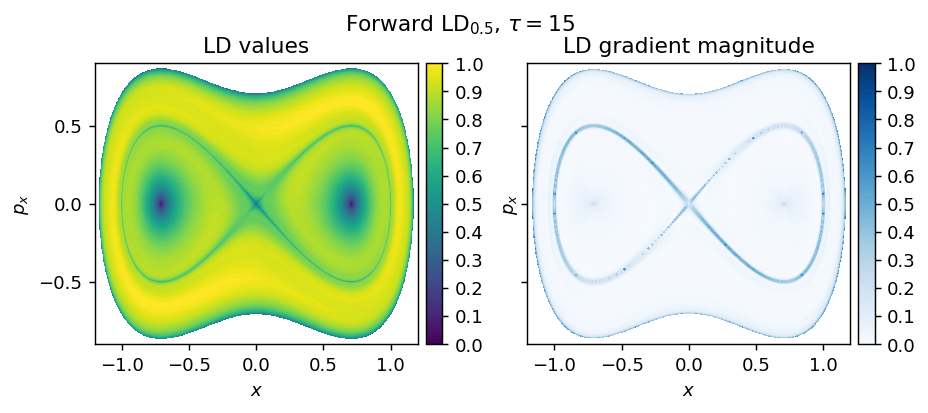

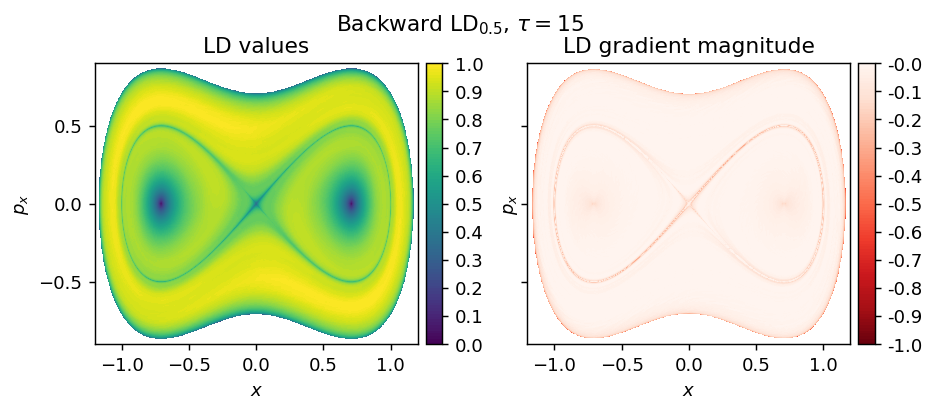

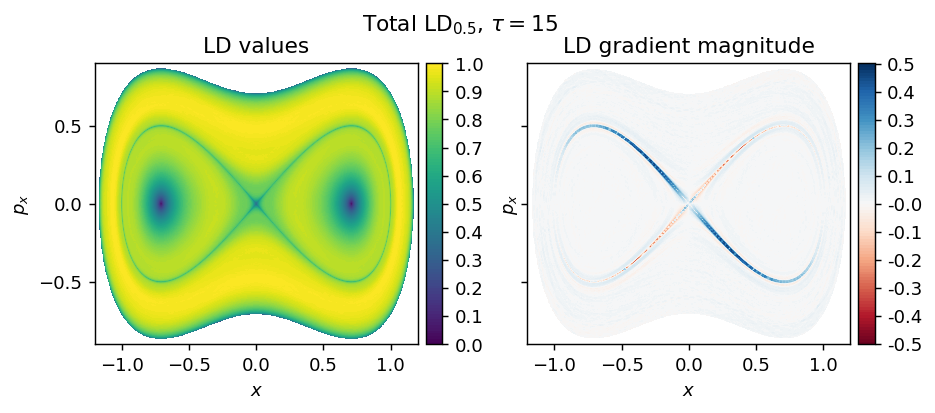

In [45]:
# Integration parameters to calculate LDs at time t = t0 by integrating trajectories 
# over the time interval [t0-tau,t0+tau]

# Initial time
t0 = 0

# Time interval half-width
tau = 15

# LDs definition (we will use the p-value seminorm)
p_value = 0.5

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Define phase space slice to compute LDs

We will use the plane $y-p_y$ where $x = \dfrac{\sqrt{2}}{2}$ and directionality is given by $p_x >0$

In [46]:
# Grid parameters
ax1_min,ax1_max = [-1, 1]
ax2_min,ax2_max = [-1, 1]
N1, N2 = [500, 500]
slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

# Phase space slice definition
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [np.sqrt(2)/2] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

### Compute and draw LDs at time $t = 0$

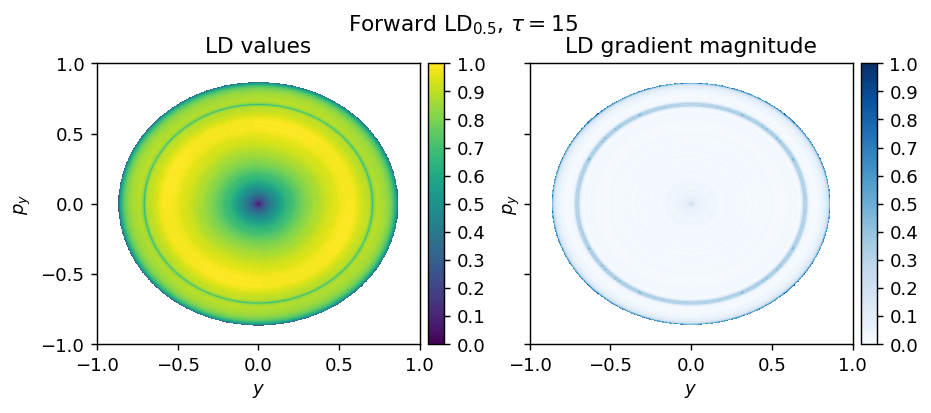

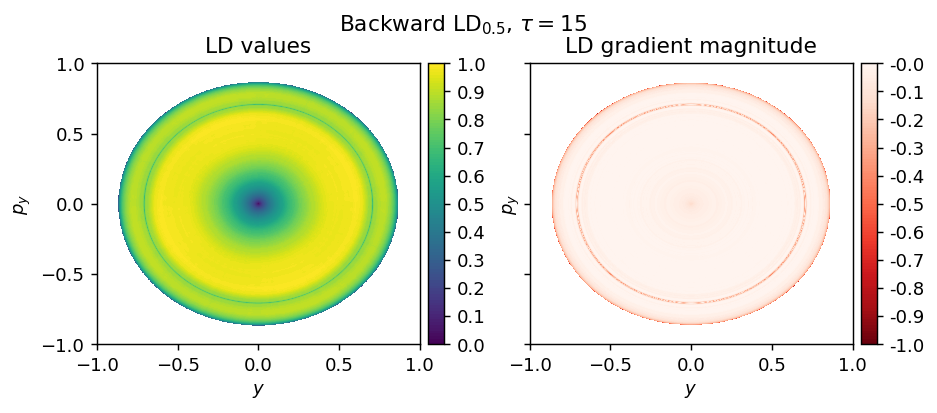

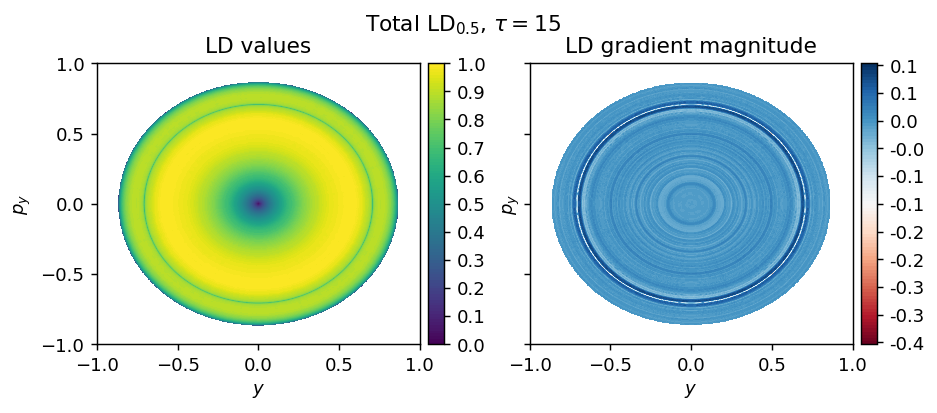

In [47]:
# Integration parameters to calculate LDs at time t = t0 by integrating trajectories 
# over the time interval [t0-tau,t0+tau]

# Initial time
t0 = 0

# Time interval half-width
tau = 15

# LDs definition
p_value = 0.5

LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)